In [8]:

import time
import numpy as np
import argparse
import RNA
import pickle
import matplotlib.pyplot as plt

from rna_folding.parsing import gpmap_to_dict, viennarna_to_gp_map_file
from rna_folding.utils import count_bp
from rna_folding.evaluate import f1_score

path = "/home/lgold/phd/research/projects/connectivity/rna_folding/data/RNA12/mfe/"

Evaluate structure ...
Done: --- 2.002716064453125e-05 seconds ---
Cases with identical bp but they are unfolded: 14546


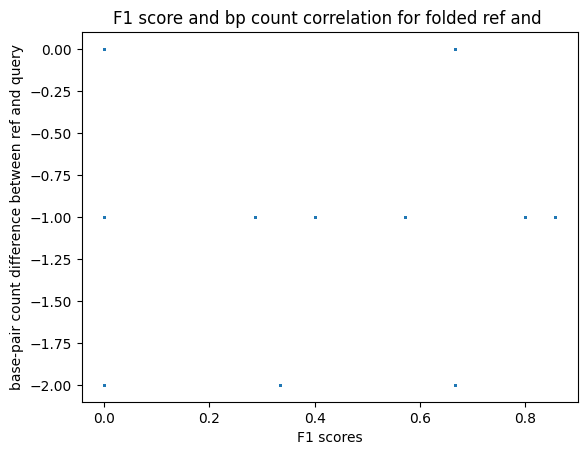

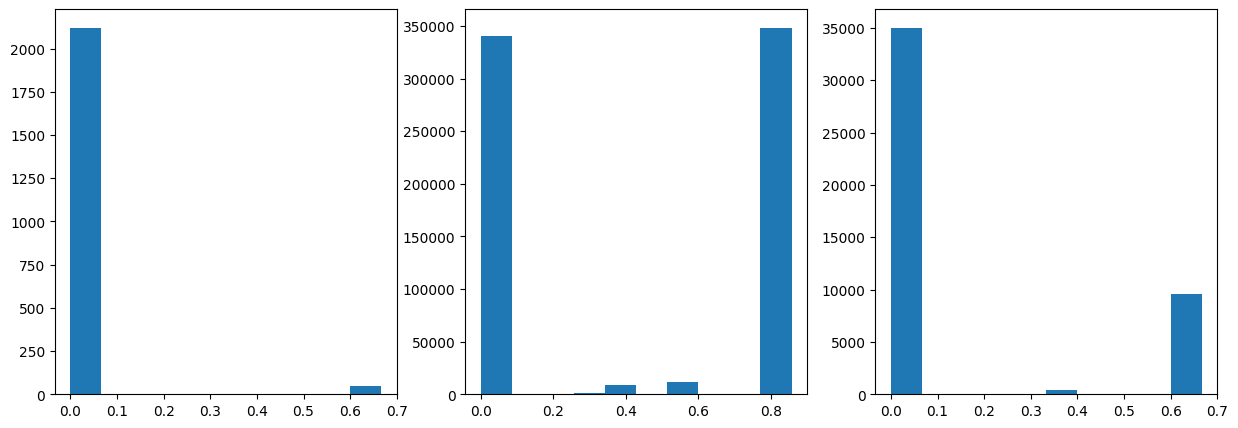

In [10]:
with open(path + "RNA12_gpmap_dict.pickle", "rb") as file:
        gp_map = pickle.load(file)
    
viennarna = "/home/lgold/phd/research/projects/connectivity/rna_folding/data/RNA12/raw/viennarna_predictions/RNA12_ph.txt"
ref_dict = viennarna_to_gp_map_file(viennarna)

L = len(list(gp_map.keys())[0])

# g_mfe_map = {}

print("Evaluate structure ...")
start_time = time.time()
# for seq in gp_map:
#     g_mfe_map[seq] = [RNA.eval_structure_simple(seq, struc) for struc in 
                    #   gp_map[seq]] 

# with open("RNA12_energies.pickle", "wb") as file:
#     pickle.dump(g_mfe_map, file)
print("Done: --- %s seconds ---" % (time.time() - start_time))

with open(path+"RNA12_energies.pickle", "rb") as file:
    g_mfe_map = pickle.load(file)

# with open(args.reference, "r") as ref:
#     ref_dict = dict([line.strip().split() for line in ref])

f1_scores = []
f1_scores_folded = []
mfe_unfolded = []
mfes = []
f1_scores_same_bp_count = []
bp_diff_ref_fold_f1_blow_one = []
f1_scores_folded_blow_one = []
both_unfolded = 0
unfolded = "." * 12
for seq in g_mfe_map:
    mfe_struc_id = np.argmin(g_mfe_map[seq])  # get lowest energy struc
    mfes.append(g_mfe_map[seq][mfe_struc_id])
    ph = gp_map[seq][mfe_struc_id]  # fetch phenotype
    
    ref_ph = ref_dict[seq]
    bp_ph = count_bp(ph)
    bp_ref = count_bp(ref_ph)
    f1_sc = f1_score(ref_ph, ph)
    f1_scores.append(f1_sc)
    if ref_ph == unfolded:
        mfe_unfolded.append(g_mfe_map[seq][mfe_struc_id])
    else:
        f1_scores_folded.append(f1_sc)
        if f1_sc < 1:
            f1_scores_folded_blow_one.append(f1_sc)
            bp_diff_ref_fold_f1_blow_one.append(bp_ref-bp_ph)    

    if bp_ph == bp_ref:
        # f1_sc = f1_score(ref_ph, ph)
        if bp_ph == 0:
            both_unfolded += 1
        else:
            f1_scores_same_bp_count.append(f1_sc)

print(f"Cases with identical bp but they are unfolded: {both_unfolded}")


    

# fig1, ax = plt.subplots()
# ax.hist(f1_scores)

# ax.set_xlabel("F1 scores")
# ax.set_ylabel("Counts")
# ax.set_title("Evaluate mfe structure of Nussinov's algorithm against ViennaRNA")
# fig1.savefig("mfe_f1_scores_hist.png")

# fig2, ax = plt.subplots()
# ax.hist(mfes)

# ax.set_xlabel("Minimum Free Energy")
# ax.set_ylabel("Counts")
# ax.set_title("Minimum Free Energy histogram")
# fig2.savefig("mfe_hist.png")

# fig3, ax = plt.subplots()
# ax.hist(mfe_unfolded)

# ax.set_xlabel("Minimum Free Energy")
# ax.set_ylabel("Counts")
# ax.set_title("Minimum Free Energy when ref is unfolded histogram")
# fig3.savefig("mfe_unfolded_ref_hist.png")

# fig4, ax = plt.subplots()
# ax.hist(f1_scores_folded)

# ax.set_xlabel("F1 scores for folded ref")
# ax.set_ylabel("Counts")
# ax.set_title("F1 score when ref is folded histogram")
# fig4.savefig("f1_scores_folded.png")

# fig5, ax = plt.subplots()
# ax.hist(f1_scores_same_bp_count)

# ax.set_xlabel("F1 scores for identical number of bp in ref and query")
# ax.set_ylabel("Counts")
# ax.set_title("F1 score for structures with same bp in ref and query")
# fig5.savefig("f1_scores_same_bp.png")


zipped_sorted = [(x, y) for (y,x) in 
    sorted(zip(f1_scores_folded_blow_one, bp_diff_ref_fold_f1_blow_one), 
        key=lambda pair: pair[0])]

bp_diff, f1_scores_sort  = list(zip(*zipped_sorted))

fig6, ax = plt.subplots()

ax.scatter(f1_scores_sort, bp_diff, alpha=0.3, s=1)
ax.set_xlabel("F1 scores")
ax.set_ylabel("base-pair count difference between ref and query")
ax.set_title("F1 score and bp count correlation for folded ref and ")
fig6.savefig("f1_score_bp_correlation_ref_folded.png")


bp_diff_zero = []
bp_diff_one = []
bp_diff_two = []
for bp_d, f1_ in zip(bp_diff, f1_scores_sort):
    if bp_d == 0:
        bp_diff_zero.append(f1_)
    elif bp_d == -1:
        bp_diff_one.append(f1_)
    elif bp_d == -2:
        bp_diff_two.append(f1_)

fig7, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

ax1.hist(bp_diff_zero)
ax2.hist(bp_diff_one)
ax3.hist(bp_diff_two)
fig7.savefig("f1_scores_by_bp_diff.png")




        


